### Yeast Dataset

In [9]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

#Importing Yeast Dataset
dataset = pd.read_csv('yeast.data',sep='\s+')
data = pd.DataFrame(dataset)

X = data.iloc[:, 0:9].values
Y = data.iloc[:, -1].values
print(data)
print(X.shape)
print(Y.shape)

      ADT1_YEAST  0.58  0.61  0.47  0.13  0.50  0.00  0.48  0.22  MIT
0     ADT2_YEAST  0.43  0.67  0.48  0.27   0.5   0.0  0.53  0.22  MIT
1     ADT3_YEAST  0.64  0.62  0.49  0.15   0.5   0.0  0.53  0.22  MIT
2     AAR2_YEAST  0.58  0.44  0.57  0.13   0.5   0.0  0.54  0.22  NUC
3     AATM_YEAST  0.42  0.44  0.48  0.54   0.5   0.0  0.48  0.22  MIT
4     AATC_YEAST  0.51  0.40  0.56  0.17   0.5   0.5  0.49  0.22  CYT
...          ...   ...   ...   ...   ...   ...   ...   ...   ...  ...
1478  YUR1_YEAST  0.81  0.62  0.43  0.17   0.5   0.0  0.53  0.22  ME2
1479  ZIP1_YEAST  0.47  0.43  0.61  0.40   0.5   0.0  0.48  0.47  NUC
1480  ZNRP_YEAST  0.67  0.57  0.36  0.19   0.5   0.0  0.56  0.22  ME2
1481  ZUO1_YEAST  0.43  0.40  0.60  0.16   0.5   0.0  0.53  0.39  NUC
1482  G6PD_YEAST  0.65  0.54  0.54  0.13   0.5   0.0  0.53  0.22  CYT

[1483 rows x 10 columns]
(1483, 9)
(1483,)


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 10 columns):
ADT1_YEAST    1483 non-null object
0.58          1483 non-null float64
0.61          1483 non-null float64
0.47          1483 non-null float64
0.13          1483 non-null float64
0.50          1483 non-null float64
0.00          1483 non-null float64
0.48          1483 non-null float64
0.22          1483 non-null float64
MIT           1483 non-null object
dtypes: float64(8), object(2)
memory usage: 116.0+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
Y = labelencoder.fit_transform(Y)
print(X)
print(Y)

[[32 0.43 0.67 ... 0.0 0.53 0.22]
 [33 0.64 0.62 ... 0.0 0.53 0.22]
 [2 0.58 0.44 ... 0.0 0.54 0.22]
 ...
 [1459 0.67 0.57 ... 0.0 0.56 0.22]
 [1460 0.43 0.4 ... 0.0 0.53 0.39]
 [354 0.65 0.54 ... 0.0 0.53 0.22]]
[6 6 7 ... 4 7 0]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

names = ['KNeighborsClassifier','SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB','MLPClassifier']
models = [KNeighborsClassifier(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 60)),
          LogisticRegression(),
          GaussianNB(),
          MLPClassifier()]

param_distributions = {
    'KNeighborsClassifier': {'n_neighbors': [10,20,30,40,50], 'metric':['minkowski','euclidean']},
    'SVC': {'kernel':['rbf', 'linear'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10, 100]},
    'DecisionTreeClassifier': {'criterion':['gini','entropy'], 'max_depth': [10,20,30,50]},
    'RandomForestClassifier': {'n_estimators': [10, 50, 100, 200]},
    'AdaBoostClassifier': {'n_estimators': [50, 100, 200,300], 'learning_rate':[0.01,0.5,0.8]},
    'LogisticRegression': {'max_iter':[100,130,140],'C': np.logspace(-2, 2, 5), 'solver':['lbfgs','liblinear']},
    'GaussianNB': {},
    'MLPClassifier': {'hidden_layer_sizes': [(100,),(200,)],'activation':['tanh', 'relu']}
}

accuracy= np.zeros(8)
for counter, model in enumerate(models):
    np.random.seed(0);
    randcv = RandomizedSearchCV(model, param_distributions[names[counter]], n_jobs=2, cv=3, n_iter=100)
    randcv.fit(X_train, Y_train)
    Y_pred = randcv.best_estimator_.predict(X_test)
    accuracy[counter] = round(f1_score(Y_test, Y_pred, average='micro'),3)
    print("f1_score for " + names[counter] + ":",accuracy[counter])

C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 24 is smaller tha

f1_score for KNeighborsClassifier: 0.576


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


f1_score for SVC: 0.596


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


f1_score for DecisionTreeClassifier: 0.553


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


f1_score for RandomForestClassifier: 0.62


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


f1_score for AdaBoostClassifier: 0.545


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


f1_score for LogisticRegression: 0.594


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n

f1_score for GaussianNB: 0.112


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


f1_score for MLPClassifier: 0.606


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Statlog-German credit dataset models accuracy')

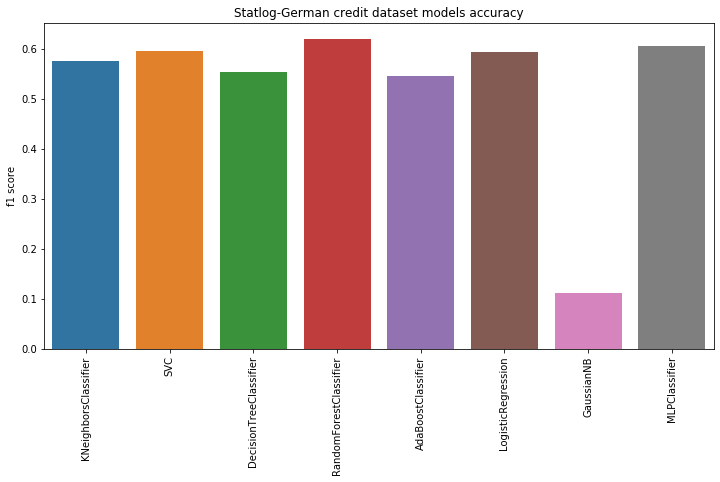

In [16]:
#Comparision graph between all models
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6],accuracy[7]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('f1 score')
plt.title('Statlog-German credit dataset models accuracy')